# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
rolling_dice = []
for i in range(10):
    rolling_dice.append(random.randint(1, 6))

dice_rolls_df = pd.DataFrame({'Roll': range(1, 11), 'Result': rolling_dice})

dice_rolls_df
print(rolling_dice)

[3, 3, 6, 1, 6, 3, 2, 3, 6, 2]


#### 2.- Plot the results sorted by value.

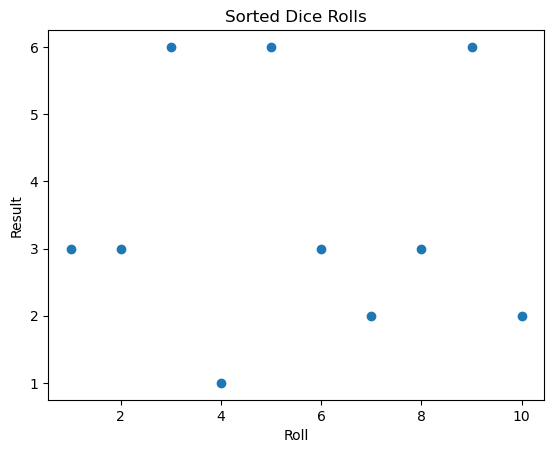

In [3]:
sorted_df = dice_rolls_df.sort_values(by='Result')

plt.scatter(sorted_df['Roll'], sorted_df['Result'])
plt.xlabel('Roll')
plt.ylabel('Result')
plt.title('Sorted Dice Rolls')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

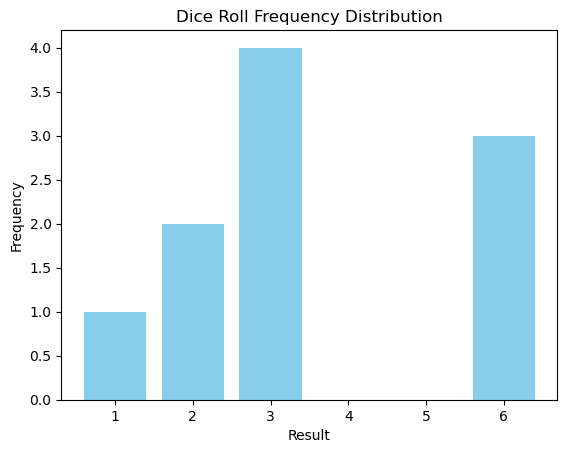

In [4]:
frequency_distribution = sorted_df['Result'].value_counts().sort_index()

plt.bar(frequency_distribution.index, frequency_distribution.values, color='skyblue')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()


En el primer grafico se muestra el resultado de cada una de las tiradas ordenadas por su resultado, de 1 a 6.

En el segundo se representa la frecuencia con la que cada número del dado aparece en cada tirada, 
siendo el eje y el número de veces que ha salido


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
def mean(data):
    total_sum = 0
    total_count = 0

    for value in data:
        total_sum += value
        total_count += 1

    mean = total_sum / total_count

    return mean


In [14]:
mean(rolling_dice)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
weighted_sum = sum(value * frequency for value, frequency in zip(set(rolling_dice), (rolling_dice.count(x) for x in set(rolling_dice))))

sum_of_frequencies = sum(rolling_dice.count(x) for x in set(rolling_dice))

mean = weighted_sum / sum_of_frequencies

mean

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
def median(data):
    
    sorted_data = sorted(rolling_dice)
    
    n = len(sorted_data)
    middle = n // 2
    
    if n % 2 == 1:
        median = sorted_data[middle]
    else:
        median = (sorted_data[middle - 1] + sorted_data[middle]) / 2
    
    return median

In [9]:
median(rolling_dice)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [15]:
def quartiles(data):
    sorted_data = sorted(data)
    
    n = len(sorted_data)
    middle = n // 2
    
    if n % 2 == 1:
        q2 = sorted_data[middle]
        lower_half = sorted_data[:middle]
        upper_half = sorted_data[middle + 1:]
    else:
        q2 = (sorted_data[middle - 1] + sorted_data[middle]) / 2
        lower_half = sorted_data[:middle]
        upper_half = sorted_data[middle:]
    
    q1 = mean(lower_half)
    q3 = median(upper_half)
    
    return q1, q2, q3

In [16]:
q1, q2, q3 = quartiles(rolling_dice)
print(f'Q1 : {q1}')
print(f'Q2 : {q2}')
print(f'Q3 : {q3}')

Q1 : 2.2
Q2 : 3.0
Q3 : 3.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

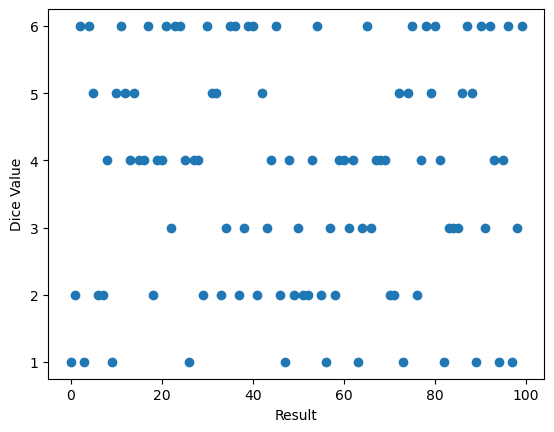

In [18]:
roll_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
sorted_values = roll_dice_hundred['value'].sort_values()



plt.scatter(sorted_values.index, sorted_values, marker='o')
plt.xlabel('Result')
plt.ylabel('Dice Value')
plt.show()

In [19]:
"""
Se aprecia que puede ser un fenómeno aleatorio al estar distribuidos de manera uniforme los resultados en cada linea 'Dice Value'
"""

"\nSe aprecia que puede ser un fenómeno aleatorio al estar distribuidos de manera uniforme los resultados en cada linea 'Dice Value'\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
dice_values = roll_dice_hundred['value']

def mean(data):
    total_sum = 0
    total_count = 0

    for value in data:
        total_sum += value
        total_count += 1

    mean = total_sum / total_count

    return mean

mean_value = mean(dice_values)

print("Mean Value:", mean_value)

Mean Value: 3.74


#### 3.- Now, calculate the frequency distribution.


In [21]:
dice_values = roll_dice_hundred['value']

def calculate_frequency(data):
    frequency_distribution = data.value_counts().sort_index().to_dict()
    return frequency_distribution

frequency_dist = calculate_frequency(dice_values)


for value in range(1, 7):
    frequency = frequency_dist.get(value, 0)
    print(f"{value}: {frequency}")

1: 12
2: 17
3: 14
4: 22
5: 12
6: 23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

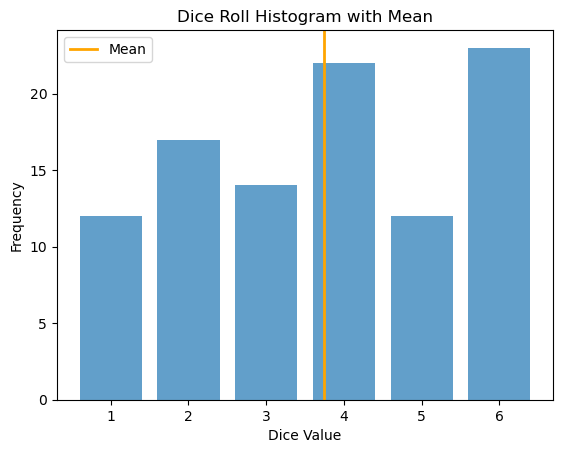

In [22]:
plt.bar(frequency_dist.keys(), frequency_dist.values(), align='center', alpha=0.7)
plt.axvline(dice_values.mean(), color='orange', linestyle='-', linewidth=2, label='Mean')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Histogram with Mean')
plt.legend()
plt.show()

In [23]:
"""
Los podemos conectar representando el valor de la media en el histograma, que vemos que aparece ligeramente por encima de 3.5
por la cantidad de cuatros y seises que aparecen en las tiradas de la muestra"""

'\nLos podemos conectar representando el valor de la media en el histograma, que vemos que aparece ligeramente por encima de 3.5\npor la cantidad de cuatros y seises que aparecen en las tiradas de la muestra'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [26]:
roll_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv', sep=',')   # Read dataframe
roll_dice_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


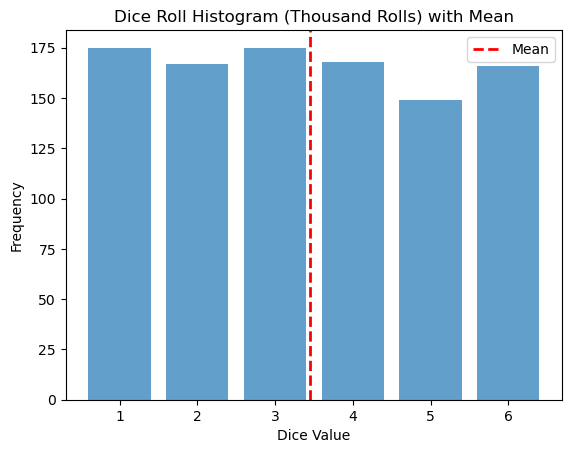

In [27]:
dice_values_thousand = roll_dice_thousand['value']

def frequency(data):
    frequency_distribution = data.value_counts().sort_index().to_dict()
    return frequency_distribution

frequency_dist_thousand = frequency(dice_values_thousand)

plt.bar(frequency_dist_thousand.keys(), frequency_dist_thousand.values(), align='center', alpha=0.7)
plt.axvline(dice_values_thousand.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Histogram (Thousand Rolls) with Mean')
plt.legend()
plt.show()

In [28]:
"""
La media se ha desplazado a un valor que corresponde con lo que se espera de un suceso aleatorio,
el valor de esta muestra (su media) ya tiende a 3,5"""

'\nLa media se ha desplazado a un valor que corresponde con lo que se espera de un suceso aleatorio,\nel valor de esta muestra (su media) ya tiende a 3,5'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [34]:
ages_population = pd.read_csv('../data/ages_population.csv')


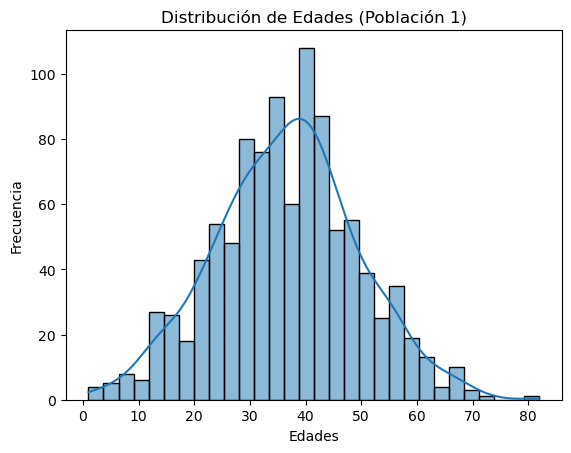

In [42]:
sns.histplot(ages_population['observation'], bins=30, kde=1)        
plt.title('Distribución de Edades (Población 1)')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
La media puede estar cercana a 40, que es donde una distribución normal tiende a tener su media; en lel punto de inflexión 

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""